# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, RFE, SelectKBest, f_classif
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
# Load Dataset
file_path = "bank_transactions_data_2.csv"
df = pd.read_csv(file_path)

print("Jumlah baris dan kolom:", df.shape)

df.head()

Jumlah baris dan kolom: (2512, 16)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
# Menampilkan ringkasan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
# Menampilkan 5 baris pertama dari dataframe untuk melihat struktur dan sampel data
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
# Menghapus kolom yang tidak digunakan untuk analisis
df = df.drop(columns=['TransactionID'])
df = df.drop(columns=['TransactionDate'])
df = df.drop(columns=['AccountID'])
df = df.drop(columns=['DeviceID'])
df = df.drop(columns=['IP Address'])
df = df.drop(columns=['MerchantID'])
df = df.drop(columns=['PreviousTransactionDate'])

In [ ]:
# Menampilkan statistik deskriptif dari dataset
df.describe(include="all")

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000
unique,NaN,2,43,3,NaN,4,NaN,NaN,NaN
top,NaN,Debit,Fort Worth,Branch,NaN,Student,NaN,NaN,NaN
freq,NaN,1944,70,868,NaN,657,NaN,NaN,NaN
mean,297.593778,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966
std,291.946243,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499
min,0.260000,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000
25%,81.885000,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000
50%,211.140000,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000
75%,414.527500,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000


In [ ]:
# Memeriksa jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


In [ ]:
# Menampilkan jumlah nilai unik dalam setiap kolom pada dataframe
print("Jumlah Nilai Unik per Kolom:")
print(df.nunique())

Jumlah Nilai Unik per Kolom:
TransactionAmount      2455
TransactionType           2
Location                 43
Channel                   3
CustomerAge              63
CustomerOccupation        4
TransactionDuration     288
LoginAttempts             5
AccountBalance         2510
dtype: int64


In [ ]:
# Memisahkan numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Menampilkan daftar numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)


Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']


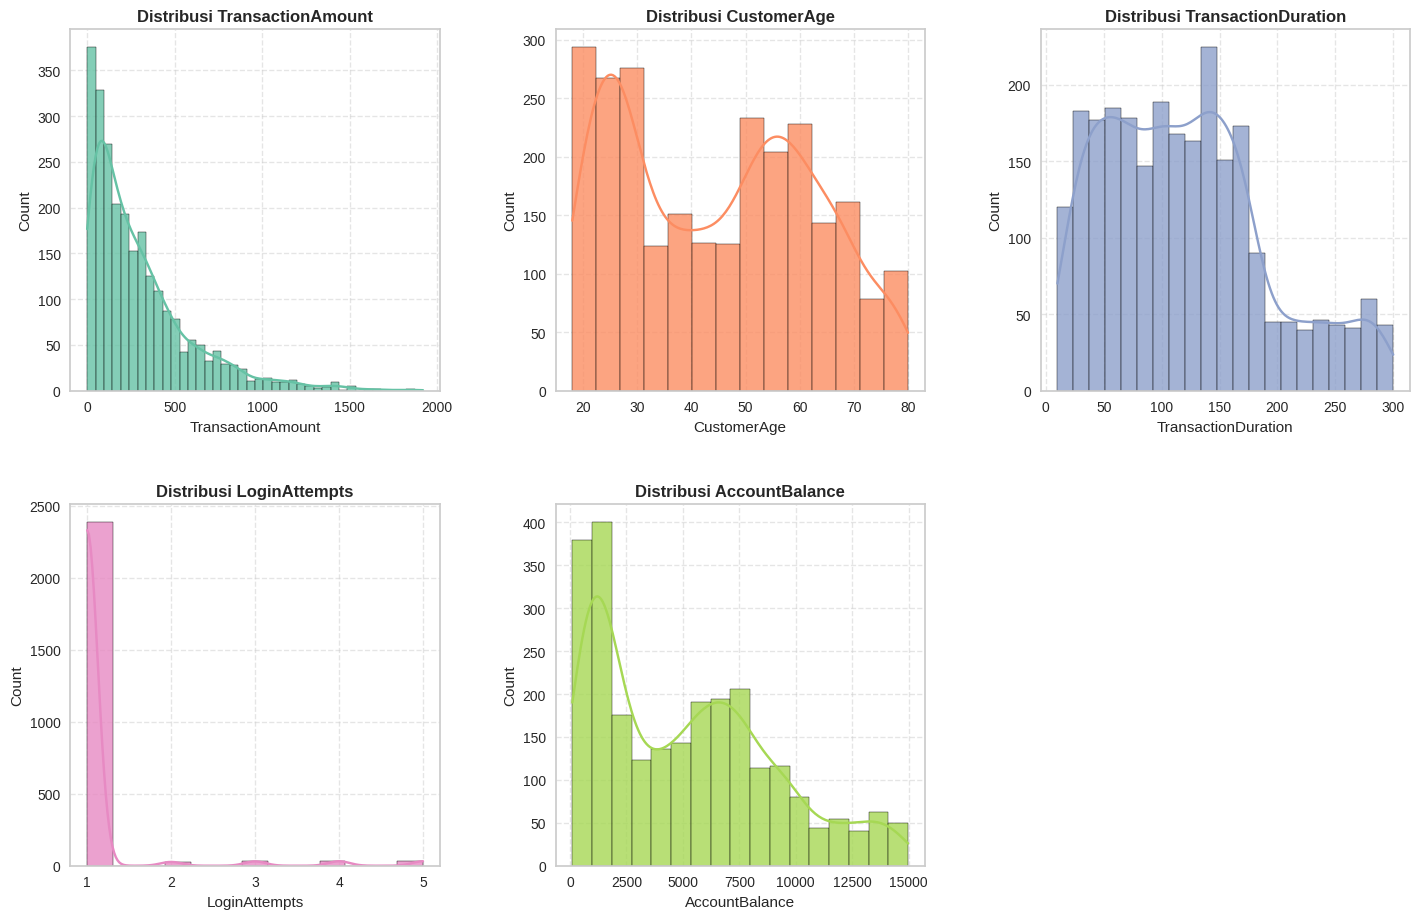

In [ ]:
# Menampilkan distribusi numerical columns
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Menentukan jumlah baris dan kolom dalam subplot
n_cols = 3
n_rows = int(np.ceil(len(numerical_columns) / n_cols))

# Membuat figure dengan ukuran yang cukup besar
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes untuk mempermudah iterasi
axes = axes.flatten()

# Looping untuk setiap kolom numerik
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, color=sns.color_palette("Set2")[i % 8], ax=axes[i], alpha=0.8)
    axes[i].set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    axes[i].grid(True, linestyle="--", alpha=0.5)

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Styling tambahan
plt.tight_layout(pad=3)
plt.show()

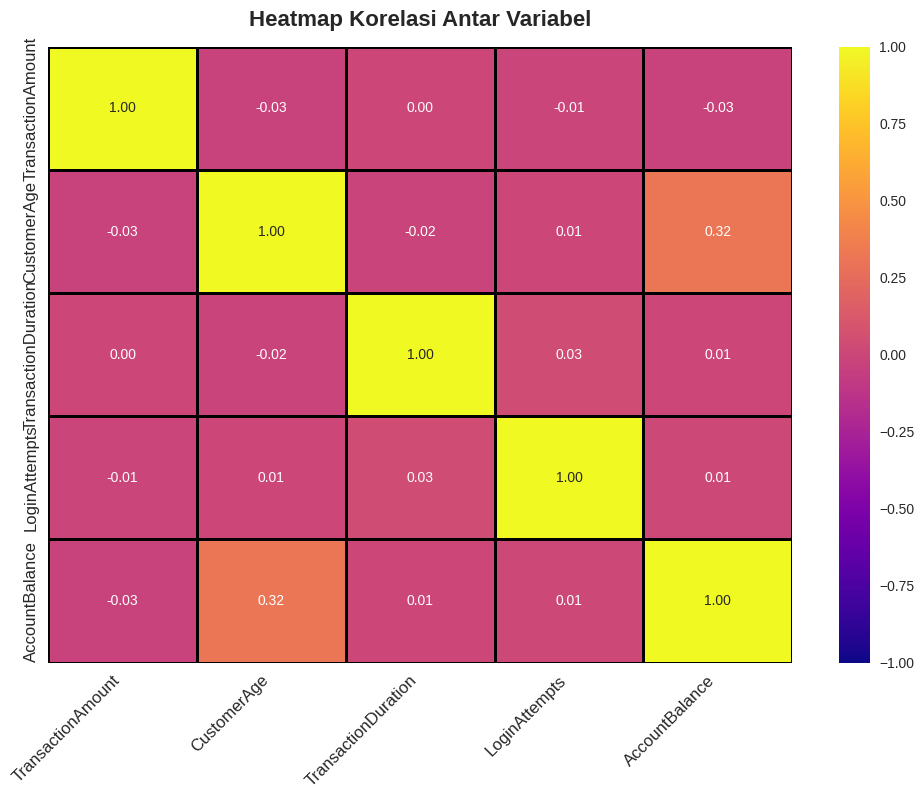

In [ ]:
# Menampilkan korelasi antar numerical columns
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
numerical_df = df[numerical_columns]

# Membuat heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_df.corr(),
            annot=True,
            cmap='plasma',
            fmt=".2f",
            linewidths=1,
            linecolor='black',
            annot_kws={"size": 10},
            vmin=-1, vmax=1)

# Styling tambahan
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=16, fontweight='bold', pad=15)
plt.show()

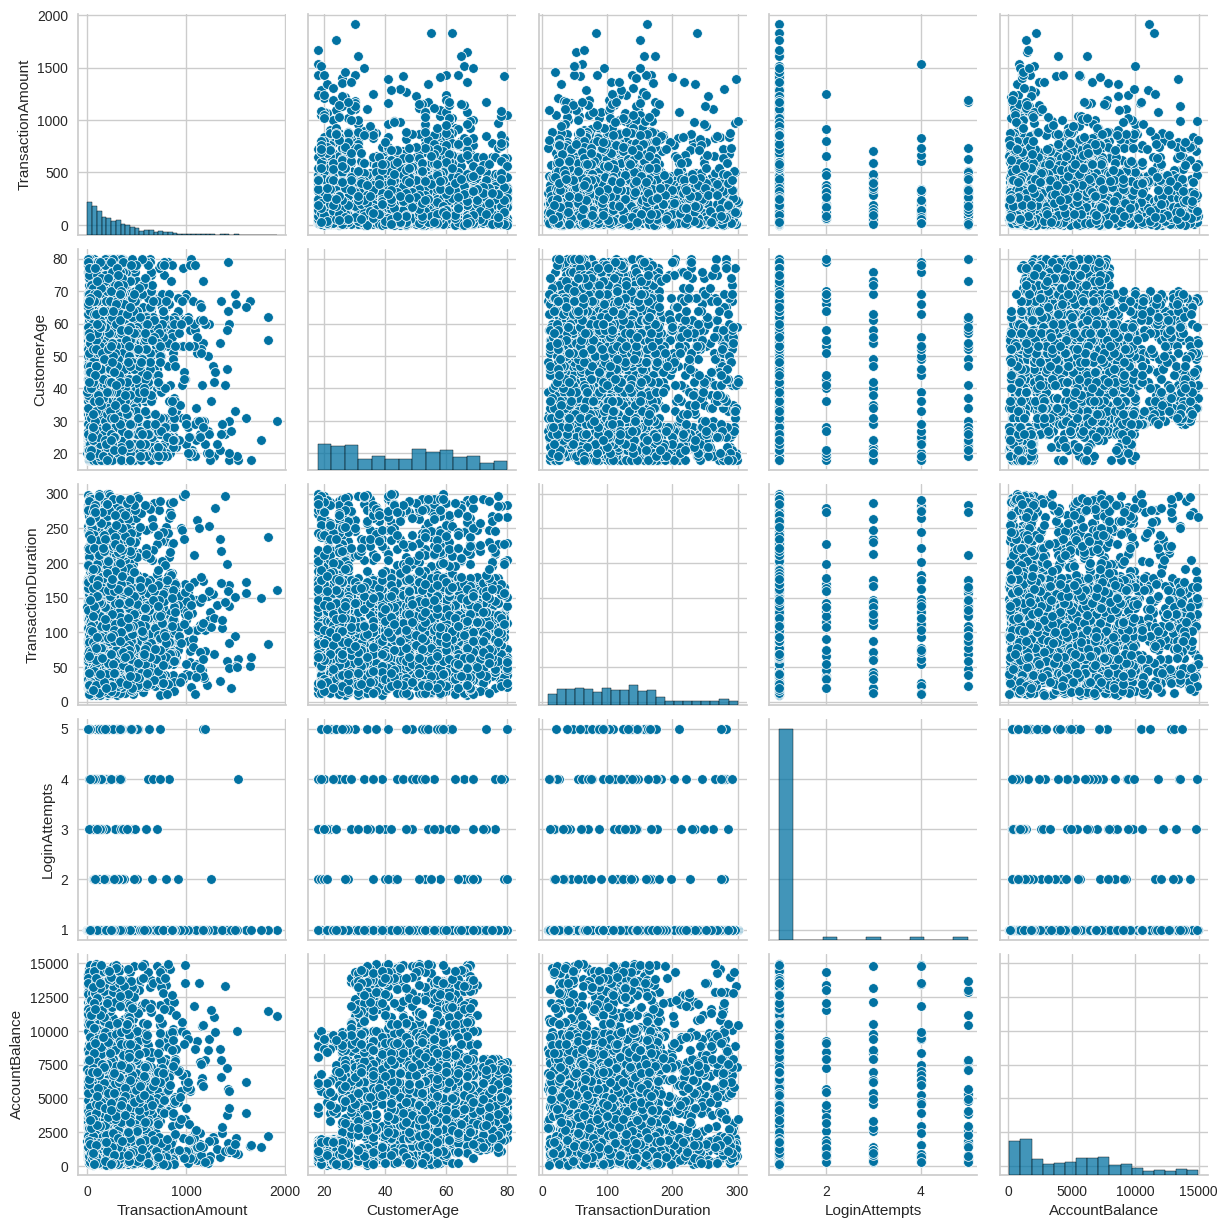

In [ ]:
# Scatter plot antar variabel numerik
sns.pairplot(df[numerical_columns])
plt.show()

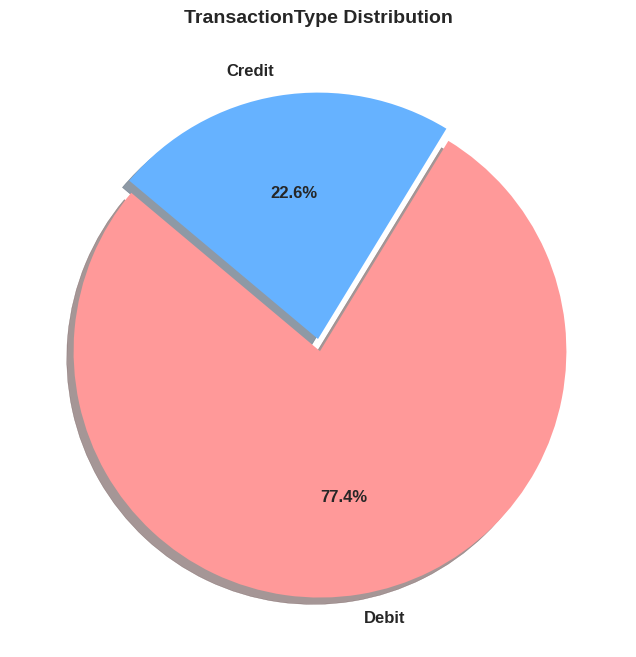

In [ ]:
# Menghitung distribusi TransactionType dan menampilkan pie chart untuk visualisasi
colors = ['#FF9999', '#66B2FF']

# Menghitung distribusi TransactionType
TransactionType_counts = df['TransactionType'].value_counts()
labels = TransactionType_counts.index

# Membuat pie chart dengan desain lebih menarik
plt.figure(figsize=(8, 8))
plt.pie(TransactionType_counts, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=[0.05, 0],
        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

plt.title('TransactionType Distribution', fontsize=14, fontweight='bold')
plt.show()

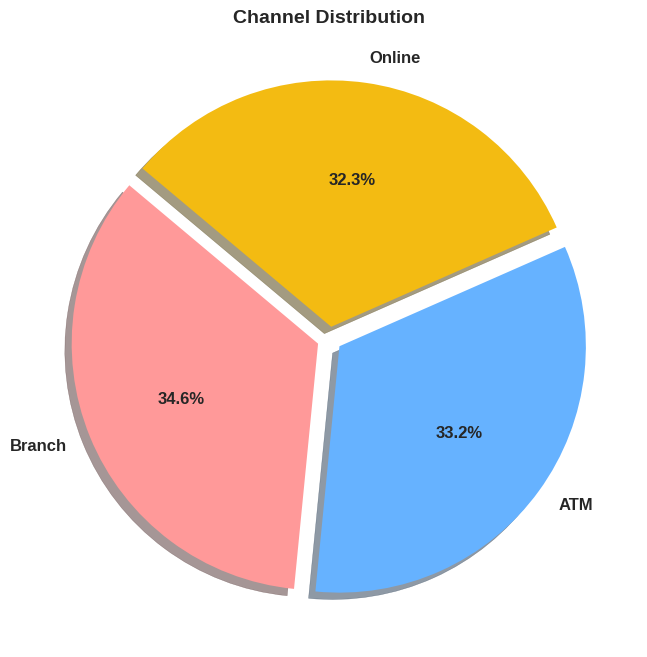

In [ ]:
# Menghitung distribusi Channel dan menampilkan pie chart untuk visualisasi
colors = ['#FF9999', '#66B2FF', '#F3BB12', '#A1D490', '#E06666']

# Menghitung distribusi Channel
Channel_counts = df['Channel'].value_counts()
labels = Channel_counts.index

# Menyesuaikan panjang explode agar sesuai dengan jumlah kategori
explode = [0.05] * len(labels)  # Memberikan efek "meledak" sedikit ke semua kategori

# Membuat pie chart dengan desain yang lebih menarik
plt.figure(figsize=(8, 8))
plt.pie(Channel_counts, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors[:len(labels)], explode=explode,
        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

plt.title('Channel Distribution', fontsize=14, fontweight='bold')
plt.show()

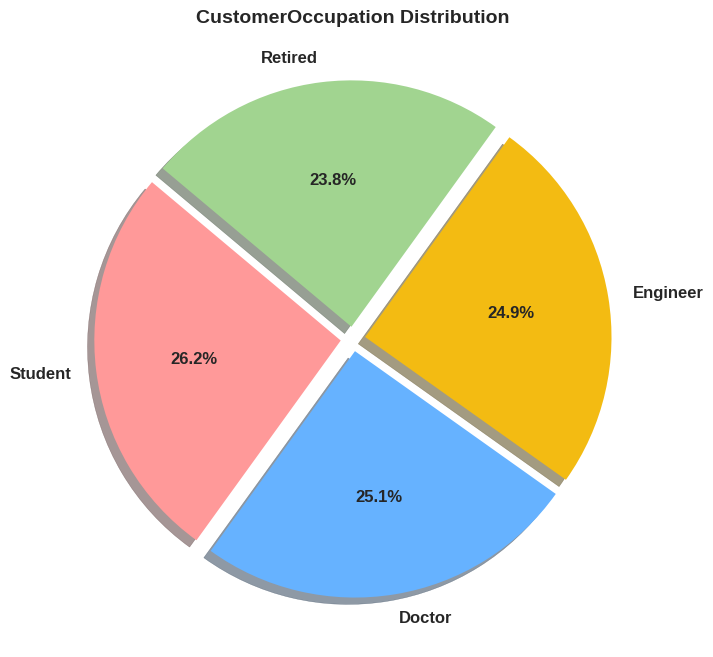

In [ ]:
# Menghitung distribusi CustomerOccupation dan menampilkan pie chart untuk visualisasi
colors = ['#FF9999', '#66B2FF', '#F3BB12', '#A1D490', '#E06666']

# Menghitung distribusi CustomerOccupation
CustomerOccupation_counts = df['CustomerOccupation'].value_counts()
labels = CustomerOccupation_counts.index

# Menyesuaikan panjang explode agar sesuai dengan jumlah kategori
explode = [0.05] * len(labels)  # Memberikan efek "meledak" sedikit ke semua kategori

# Membuat pie chart dengan desain yang lebih menarik
plt.figure(figsize=(8, 8))
plt.pie(CustomerOccupation_counts, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors[:len(labels)], explode=explode,
        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

plt.title('CustomerOccupation Distribution', fontsize=14, fontweight='bold')
plt.show()

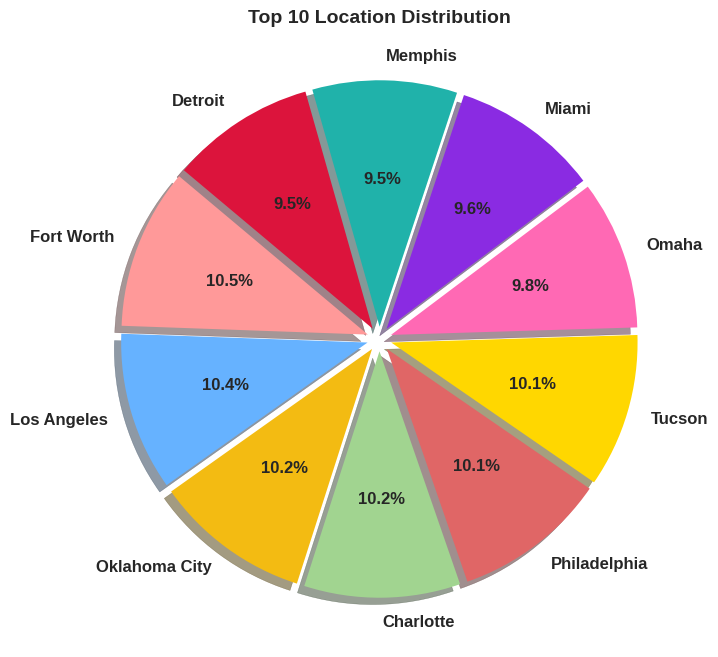

In [ ]:
# Menghitung distribusi Location dan menampilkan pie chart untuk visualisasi
colors = ['#FF9999', '#66B2FF', '#F3BB12', '#A1D490', '#E06666',
          '#FFD700', '#FF69B4', '#8A2BE2', '#20B2AA', '#DC143C']

# Menghitung distribusi Location dan mengambil 10 teratas
Location_counts = df['Location'].value_counts().head(10)
labels = Location_counts.index

# Menyesuaikan panjang explode agar sesuai dengan jumlah kategori
explode = [0.05] * len(labels)  # Efek "meledak" untuk semua kategori

# Membuat pie chart dengan desain menarik
plt.figure(figsize=(8, 8))
plt.pie(Location_counts, labels=labels, autopct='%1.1f%%',
        startangle=140, colors=colors[:len(labels)], explode=explode,
        shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})

plt.title('Top 10 Location Distribution', fontsize=14, fontweight='bold')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Menampilkan jumlah nilai null (kosong) di setiap kolom
df.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menampilkan jumlah baris duplikat dalam DataFrame
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


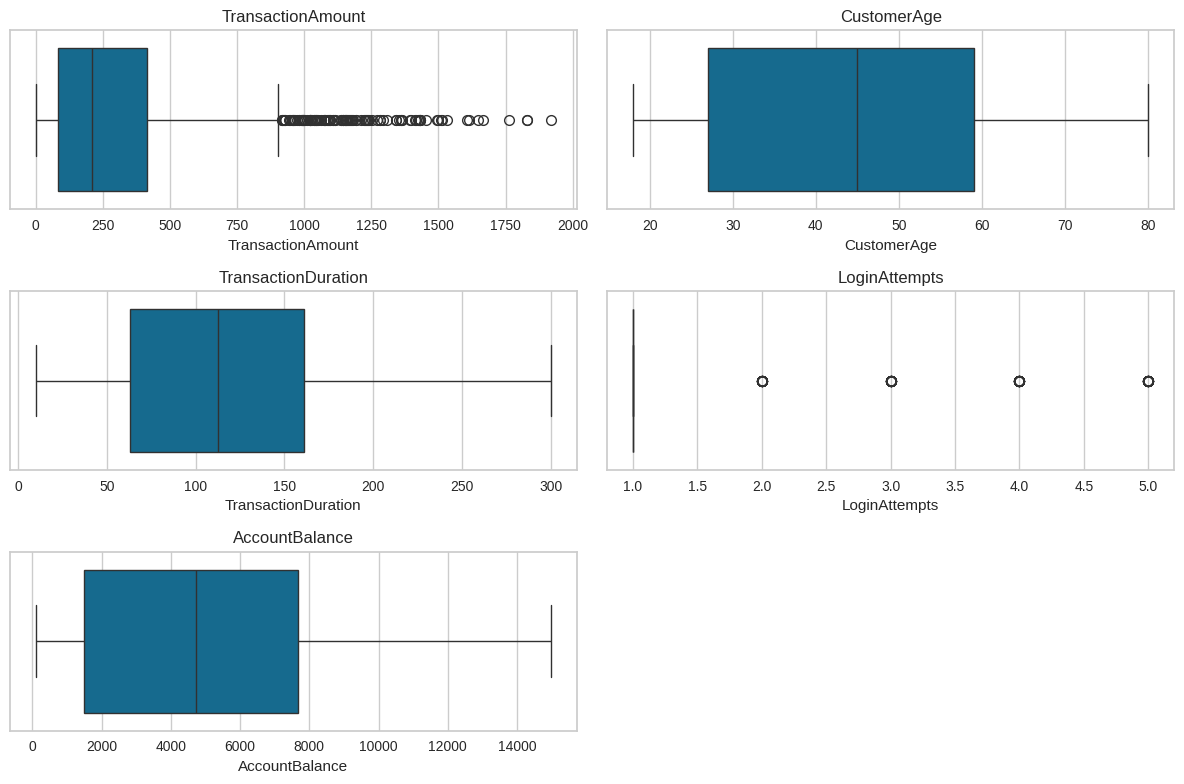

In [ ]:
# Mendeteksi outlier untuk kolom numeric menggunakan boxplot
numeric_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
# Menghitung Q1, Q3, dan IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numerical_columns]

# Menggabungkan kembali dengan kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_columns]], axis=1)

In [ ]:
# Menampilkan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2282 entries, 0 to 2511
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionAmount    2282 non-null   float64
 1   CustomerAge          2282 non-null   int64  
 2   TransactionDuration  2282 non-null   int64  
 3   LoginAttempts        2282 non-null   int64  
 4   AccountBalance       2282 non-null   float64
 5   TransactionType      2282 non-null   object 
 6   Location             2282 non-null   object 
 7   Channel              2282 non-null   object 
 8   CustomerOccupation   2282 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 178.3+ KB


In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk kolom numerik dalam DataFrame
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2282.000000,2282.000000,2282.000000,2282.0,2282.000000
mean,255.525596,44.682734,118.972831,1.0,5119.550140
std,217.793773,17.711957,69.853628,0.0,3881.419806
min,0.260000,18.000000,10.000000,1.0,101.250000
25%,77.847500,27.000000,63.000000,1.0,1515.460000
50%,198.315000,45.000000,111.000000,1.0,4762.410000
75%,376.255000,59.000000,161.000000,1.0,7641.830000
max,903.190000,80.000000,300.000000,1.0,14977.990000


In [ ]:
# Membuat salinan dataset asli agar tidak mengubah data asli
df_scaled = df.copy()

# Inisialisasi MinMaxScaler untuk normalisasi data
minmax_scaler = MinMaxScaler()

# Daftar kolom yang akan dinormalisasi
columns_to_normalize = ['TransactionDuration']

# Melakukan normalisasi menggunakan MinMaxScaler (mengubah skala ke rentang [0,1])
df_scaled[columns_to_normalize] = minmax_scaler.fit_transform(df_scaled[columns_to_normalize])

# Menampilkan lima baris pertama dari dataset yang telah dinormalisasi
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,14.09,70,0.244828,1,5112.21,Debit,San Diego,ATM,Doctor
1,376.24,68,0.451724,1,13758.91,Debit,Houston,ATM,Doctor
2,126.29,19,0.158621,1,1122.35,Debit,Mesa,Online,Student
3,184.50,26,0.051724,1,8569.06,Debit,Raleigh,Online,Student
4,13.45,26,0.648276,1,7429.40,Credit,Atlanta,Online,Student


In [ ]:
# Inisialisasi StandardScaler untuk standarisasi data
standard_scaler = StandardScaler()

# Daftar kolom yang akan distandarisasi
columns_to_standardize = ['CustomerAge', 'TransactionAmount', 'AccountBalance']

# Melakukan standarisasi (mean = 0, standar deviasi = 1) pada kolom yang dipilih
df_scaled[columns_to_standardize] = standard_scaler.fit_transform(df_scaled[columns_to_standardize])

# Menampilkan lima baris pertama dari dataset setelah standarisasi
df_scaled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType,Location,Channel,CustomerOccupation
0,-1.108794,1.429702,0.244828,1,-0.001892,Debit,San Diego,ATM,Doctor
1,0.554382,1.316759,0.451724,1,2.226312,Debit,Houston,ATM,Doctor
2,-0.593515,-1.450340,0.158621,1,-1.030055,Debit,Mesa,Online,Student
3,-0.326185,-1.055040,0.051724,1,0.888919,Debit,Raleigh,Online,Student
4,-1.111734,-1.055040,0.648276,1,0.595235,Credit,Atlanta,Online,Student


In [ ]:
# Melakukan One-Hot Encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df_scaled, columns=['TransactionType', 'Channel', 'CustomerOccupation'])

# Menampilkan lima baris pertama dari dataset setelah encoding
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,0.244828,1,-0.001892,San Diego,False,True,True,False,False,True,False,False,False
1,0.554382,1.316759,0.451724,1,2.226312,Houston,False,True,True,False,False,True,False,False,False
2,-0.593515,-1.450340,0.158621,1,-1.030055,Mesa,False,True,False,False,True,False,False,False,True
3,-0.326185,-1.055040,0.051724,1,0.888919,Raleigh,False,True,False,False,True,False,False,False,True
4,-1.111734,-1.055040,0.648276,1,0.595235,Atlanta,True,False,False,False,True,False,False,False,True


In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom 'Location' menjadi nilai numerik menggunakan Label Encoding
df_encoded['Location'] = label_encoder.fit_transform(df_encoded['Location'])

# Menampilkan lima baris pertama dataset setelah encoding
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,0.244828,1,-0.001892,36,False,True,True,False,False,True,False,False,False
1,0.554382,1.316759,0.451724,1,2.226312,15,False,True,True,False,False,True,False,False,False
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,False,True,False,False,True,False,False,False,True
3,-0.326185,-1.055040,0.051724,1,0.888919,33,False,True,False,False,True,False,False,False,True
4,-1.111734,-1.055040,0.648276,1,0.595235,1,True,False,False,False,True,False,False,False,True


In [ ]:
# Menampilkan 5 baris pertama dari dataset setelah proses encoding
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,0.244828,1,-0.001892,36,False,True,True,False,False,True,False,False,False
1,0.554382,1.316759,0.451724,1,2.226312,15,False,True,True,False,False,True,False,False,False
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,False,True,False,False,True,False,False,False,True
3,-0.326185,-1.055040,0.051724,1,0.888919,33,False,True,False,False,True,False,False,False,True
4,-1.111734,-1.055040,0.648276,1,0.595235,1,True,False,False,False,True,False,False,False,True


In [ ]:
# Mengambil semua kolom hasil One-Hot Encoding (OHE) yang diawali dengan 'TransactionType', 'Channel', atau 'CustomerOccupation'
onehot_columns = df_encoded.columns[df_encoded.columns.str.startswith(('TransactionType', 'Channel', 'CustomerOccupation'))]

# Mengubah tipe data kolom hasil One-Hot Encoding menjadi integer (default-nya bisa dalam bentuk float)
df_encoded[onehot_columns] = df_encoded[onehot_columns].astype(int)

In [ ]:
# Menampilkan 5 baris pertama dari dataset setelah proses encoding
df_encoded.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,0.244828,1,-0.001892,36,0,1,1,0,0,1,0,0,0
1,0.554382,1.316759,0.451724,1,2.226312,15,0,1,1,0,0,1,0,0,0
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,0,1,0,0,1,0,0,0,1
3,-0.326185,-1.055040,0.051724,1,0.888919,33,0,1,0,0,1,0,0,0,1
4,-1.111734,-1.055040,0.648276,1,0.595235,1,1,0,0,0,1,0,0,0,1


In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk kolom "CustomerAge"
df["CustomerAge"].describe()

,CustomerAge
count,2282.000000
mean,44.682734
std,17.711957
min,18.000000
25%,27.000000
50%,45.000000
75%,59.000000
max,80.000000


In [ ]:
# Menampilkan ringkasan statistik deskriptif untuk kolom "CustomerAge" setelah encoding
df_encoded["CustomerAge"].describe()

,CustomerAge
count,2.282000e+03
mean,-2.039463e-16
std,1.000219e+00
min,-1.506812e+00
25%,-9.985689e-01
50%,1.791643e-02
75%,8.085162e-01
max,1.994416e+00


In [ ]:
# Definisikan batas kelompok umur (bins) dan label kategori
bins = [18, 25, 40, 60, 80]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']

# Mengelompokkan (binning) usia pelanggan ke dalam kategori yang telah ditentukan
df['CustomerAge_Binned'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

In [ ]:
# Menyalin DataFrame yang telah dienkode sebagai data akhir setelah preprocessing
df_final = df_encoded.copy()

# Menambahkan kembali kolom kategori usia yang telah dibinned sebelumnya
df_final['CustomerAge_Binned'] = df['CustomerAge_Binned'].values

# Menampilkan 5 baris pertama dari DataFrame final
df_final.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned
0,-1.108794,1.429702,0.244828,1,-0.001892,36,0,1,1,0,0,1,0,0,0,Lansia
1,0.554382,1.316759,0.451724,1,2.226312,15,0,1,1,0,0,1,0,0,0,Lansia
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,0,1,0,0,1,0,0,0,1,Remaja
3,-0.326185,-1.055040,0.051724,1,0.888919,33,0,1,0,0,1,0,0,0,1,Dewasa Muda
4,-1.111734,-1.055040,0.648276,1,0.595235,1,1,0,0,0,1,0,0,0,1,Dewasa Muda


In [ ]:
# Menampilkan ringkasan statistik dari dataset setelah preprocessing
df_final.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
count,2.282000e+03,2.282000e+03,2282.000000,2282.0,2.282000e+03,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,-1.323316e-16,-2.039463e-16,0.375768,1.0,-6.227368e-17,21.076687,0.226994,0.773006,0.328659,0.349693,0.321648,0.249343,0.249343,0.239702,0.261613
std,1.000219e+00,1.000219e+00,0.240875,0.0,1.000219e+00,12.284826,0.418980,0.418980,0.469829,0.476978,0.467211,0.432727,0.432727,0.426995,0.439609
min,-1.172309e+00,-1.506812e+00,0.000000,1.0,-1.293187e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.159877e-01,-9.985689e-01,0.182759,1.0,-9.287529e-01,10.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.627400e-01,1.791643e-02,0.348276,1.0,-9.203292e-02,21.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.544505e-01,8.085162e-01,0.520690,1.0,6.499768e-01,31.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2.974403e+00,1.994416e+00,1.000000,1.0,2.540462e+00,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# Mengambil data numerik untuk digunakan dalam algoritma K-Means
features = df_final.select_dtypes(include=['number']).copy()

# Menghapus baris yang memiliki nilai kosong (NaN) agar tidak mengganggu pemrosesan
features = features.dropna()

# Menyalin data numerik ke variabel X sebagai fitur untuk clustering
X = features.copy()

# Menampilkan 5 baris pertama dataset yang akan digunakan dalam K-Means
X.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-1.108794,1.429702,0.244828,1,-0.001892,36,0,1,1,0,0,1,0,0,0
1,0.554382,1.316759,0.451724,1,2.226312,15,0,1,1,0,0,1,0,0,0
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,0,1,0,0,1,0,0,0,1
3,-0.326185,-1.055040,0.051724,1,0.888919,33,0,1,0,0,1,0,0,0,1
4,-1.111734,-1.055040,0.648276,1,0.595235,1,1,0,0,0,1,0,0,0,1


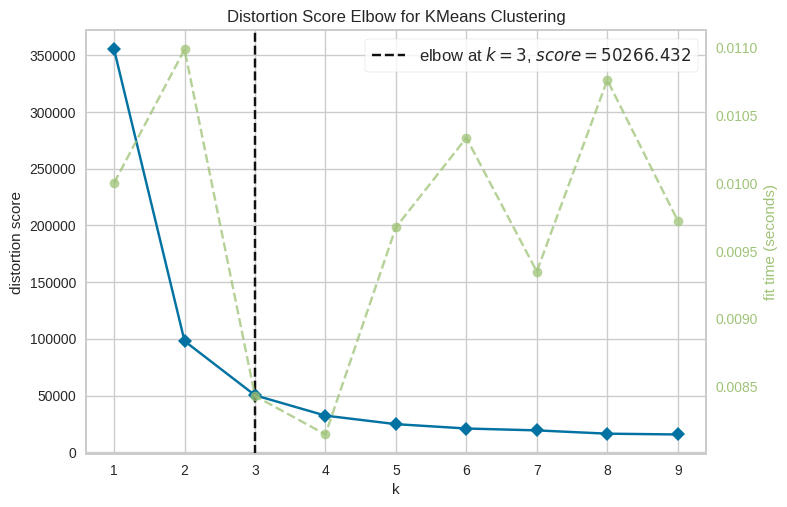

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model K-Means tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal dalam rentang 1-10
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Melatih (fit) visualizer dengan dataset X untuk menemukan titik optimal jumlah cluster
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Mengambil nilai k (jumlah klaster optimal) dari hasil metode Elbow
optimal_k = visualizer.elbow_value_

# Inisialisasi model K-Means dengan jumlah klaster optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=72, init='k-means++')

# Melatih (fit) model K-Means menggunakan dataset X
kmeans.fit(X)

KMeans(n_clusters=np.int64(3), random_state=72)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
# Menghitung Silhouette Score untuk mengevaluasi kualitas clustering
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Menampilkan hasil Silhouette Score dengan jumlah cluster optimal
print(f"Silhouette Score untuk K={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score untuk K=3: 0.5124


In [ ]:
# Inisialisasi dictionary untuk menyimpan Silhouette Score tiap jumlah cluster
silhouette_scores_initial = {}

# Evaluasi Silhouette Score untuk berbagai jumlah cluster (2 hingga 9)
for k in range(2, 10):
    # Inisialisasi model KMeans dengan jumlah cluster k
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Melatih model dan mendapatkan label klaster
    labels = kmeans.fit_predict(X)

    # Menghitung Silhouette Score untuk jumlah cluster k
    score = silhouette_score(X, labels)

    # Menyimpan skor ke dictionary
    silhouette_scores_initial[k] = score

# Menentukan jumlah cluster optimal berdasarkan skor tertinggi
optimal_k_initial = max(silhouette_scores_initial, key=silhouette_scores_initial.get)
best_score_initial = silhouette_scores_initial[optimal_k_initial]

# Menampilkan hasil evaluasi
print("Model Awal (Tanpa Feature Selection):")
print(f"Silhouette Score: {best_score_initial:.4f} (Cluster: {optimal_k_initial})\n")

Model Awal (Tanpa Feature Selection):
Silhouette Score: 0.5834 (Cluster: 2)



In [ ]:
# Melatih model K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_k_initial, random_state=42)

# Melakukan clustering dan menyimpan hasilnya ke dalam kolom 'Cluster' pada df_final
df_final['Cluster'] = kmeans.fit_predict(X)

# Menampilkan jumlah data di setiap cluster
print("Distribusi jumlah data per cluster:")
print(df_final['Cluster'].value_counts())

Distribusi jumlah data per cluster:
Cluster
0    1167
1    1115
Name: count, dtype: int64


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
# Inisialisasi VarianceThreshold dengan ambang batas 0.01
selector = VarianceThreshold(threshold=0.01)

# Menerapkan Variance Thresholding untuk memilih fitur dengan variabilitas cukup tinggi
X_selected = selector.fit_transform(X)

# Mendapatkan fitur yang dipilih berdasarkan threshold
selected_features_vt = X.columns[selector.get_support()]

# Menampilkan fitur yang terpilih setelah proses Variance Thresholding
print("Fitur yang dipilih setelah Variance Thresholding:")
print(selected_features_vt.tolist())

Fitur yang dipilih setelah Variance Thresholding:
['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'Location', 'TransactionType_Credit', 'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch', 'Channel_Online', 'CustomerOccupation_Doctor', 'CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student']


In [ ]:
# Inisialisasi SelectKBest dengan metode ANOVA F-test (f_classif) untuk memilih 5 fitur terbaik
k_best = SelectKBest(score_func=f_classif, k=5)

# Melatih model feature selection berdasarkan hubungan fitur dengan label klaster
k_best.fit(X, df_final['Cluster'])

# Mendapatkan fitur yang dipilih berdasarkan skor tertinggi
selected_features_kbest = X.columns[k_best.get_support()]

# Menampilkan fitur yang terpilih setelah SelectKBest
print("Fitur yang dipilih setelah SelectKBest:")
print(selected_features_kbest.tolist())

Fitur yang dipilih setelah SelectKBest:
['CustomerAge', 'TransactionDuration', 'Location', 'CustomerOccupation_Doctor', 'CustomerOccupation_Student']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
def backward_elimination(df, features, min_features=5, n_clusters=3):
    """
    Melakukan backward elimination untuk memilih fitur terbaik berdasarkan Silhouette Score.

    Parameter:
    - df: DataFrame yang berisi data
    - features: Daftar fitur awal yang akan dianalisis
    - min_features: Jumlah fitur minimum yang harus dipertahankan
    - n_clusters: Jumlah cluster dalam model K-Means

    Output:
    - List fitur terbaik setelah backward elimination
    """
    selected_features = features.copy()
    best_score = -1

    while len(selected_features) > min_features:
        worst_feature = None

        for feature in selected_features:
            # Membuat subset tanpa satu fitur
            temp_features = selected_features.copy()
            temp_features.remove(feature)
            X_subset = df[temp_features]

            # Melatih K-Means dan menghitung Silhouette Score
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            labels = kmeans.fit_predict(X_subset)
            score = silhouette_score(X_subset, labels)

            # Jika skor meningkat, fitur dianggap tidak terlalu penting
            if score > best_score:
                best_score = score
                worst_feature = feature

        # Hapus fitur yang mengurangi performa model
        if worst_feature:
            selected_features.remove(worst_feature)

    return selected_features

# Menjalankan backward elimination
best_features_be = backward_elimination(df_final, X.columns.tolist())

print("Fitur terbaik setelah Backward Elimination:", best_features_be)

Fitur terbaik setelah Backward Elimination: ['TransactionDuration', 'LoginAttempts', 'TransactionType_Credit', 'TransactionType_Debit', 'CustomerOccupation_Retired']


In [ ]:
def forward_selection(df, features, min_features=5, n_clusters=3):
    """
    Melakukan forward selection untuk memilih fitur terbaik berdasarkan Silhouette Score.

    Parameter:
    - df: DataFrame yang berisi data
    - features: Daftar fitur yang akan dievaluasi
    - min_features: Jumlah minimum fitur yang harus dipilih
    - n_clusters: Jumlah cluster dalam model K-Means

    Output:
    - List fitur terbaik setelah forward selection
    """
    selected_features = []
    best_score = -1

    for feature in features:
        # Membuat subset dengan fitur baru yang ditambahkan
        temp_features = selected_features + [feature]
        X_subset = df[temp_features]

        # Melatih K-Means dan menghitung Silhouette Score
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_subset)
        score = silhouette_score(X_subset, labels)

        # Jika skor meningkat atau fitur masih kurang dari batas minimal, fitur dipilih
        if score > best_score or len(selected_features) < min_features:
            best_score = score
            selected_features.append(feature)

    return selected_features

# Menjalankan forward selection
best_features_fs = forward_selection(df_final, X.columns.tolist())

print("Fitur terbaik setelah Forward Selection:", best_features_fs)

Fitur terbaik setelah Forward Selection: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'Location']


In [ ]:
# Inisialisasi model Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=5000)

# Inisialisasi Recursive Feature Elimination (RFE) untuk memilih 5 fitur terbaik
rfe_selector = RFE(model, n_features_to_select=5)

# Melatih RFE dengan data X dan target cluster
rfe_selector.fit(X, df_final['Cluster'])

# Mendapatkan daftar fitur yang dipilih
selected_features_rfe = X.columns[rfe_selector.get_support(indices=True)]

# Menampilkan hasil seleksi fitur
print("Fitur yang dipilih dengan RFE:", selected_features_rfe.tolist())

Fitur yang dipilih dengan RFE: ['CustomerAge', 'TransactionDuration', 'Location', 'Channel_ATM', 'Channel_Online']


In [ ]:
# Menyimpan hasil Silhouette Score untuk setiap metode seleksi fitur
silhouette_scores_no_pca = {"Model Awal": best_score_initial}
silhouette_scores_pca = {"Model Awal": None}

# Daftar metode seleksi fitur yang akan diuji
feature_selection_methods = {
    "Variance Thresholding": selected_features_vt,
    "SelectKBest": selected_features_kbest,
    "Backward Elimination": best_features_be,
    "Forward Selection": best_features_fs,
    "RFE": selected_features_rfe
}

# Iterasi untuk setiap metode seleksi fitur
for method, selected_features in feature_selection_methods.items():
    df_selected = X[selected_features]

    # Mencari jumlah cluster optimal tanpa PCA
    silhouette_no_pca = {}
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df_selected)
        silhouette_no_pca[k] = silhouette_score(df_selected, labels)

    optimal_k_no_pca = max(silhouette_no_pca, key=silhouette_no_pca.get)
    best_score_no_pca = silhouette_no_pca[optimal_k_no_pca]

    # Mencari jumlah cluster optimal dengan PCA
    pca = PCA(n_components=0.5)
    pca_features = pca.fit_transform(df_selected)

    silhouette_pca = {}
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(pca_features)
        silhouette_pca[k] = silhouette_score(pca_features, labels)

    optimal_k_pca = max(silhouette_pca, key=silhouette_pca.get)
    best_score_pca = silhouette_pca[optimal_k_pca]

    # Menyimpan hasil evaluasi
    silhouette_scores_no_pca[method] = best_score_no_pca
    silhouette_scores_pca[method] = best_score_pca

    # Menampilkan hasil perbandingan
    print(f"{method}:")
    print(f"   ➤ Tanpa PCA - Silhouette Score: {best_score_no_pca:.4f} (Cluster: {optimal_k_no_pca})")
    print(f"   ➤ Dengan PCA - Silhouette Score: {best_score_pca:.4f} (Cluster: {optimal_k_pca})\n")

Variance Thresholding:
   ➤ Tanpa PCA - Silhouette Score: 0.5834 (Cluster: 2)
   ➤ Dengan PCA - Silhouette Score: 0.6240 (Cluster: 2)

SelectKBest:
   ➤ Tanpa PCA - Silhouette Score: 0.6086 (Cluster: 2)
   ➤ Dengan PCA - Silhouette Score: 0.6240 (Cluster: 2)

Backward Elimination:
   ➤ Tanpa PCA - Silhouette Score: 0.7452 (Cluster: 4)
   ➤ Dengan PCA - Silhouette Score: 0.9943 (Cluster: 4)

Forward Selection:
   ➤ Tanpa PCA - Silhouette Score: 0.5960 (Cluster: 2)
   ➤ Dengan PCA - Silhouette Score: 0.6240 (Cluster: 2)

RFE:
   ➤ Tanpa PCA - Silhouette Score: 0.6078 (Cluster: 2)
   ➤ Dengan PCA - Silhouette Score: 0.6240 (Cluster: 2)



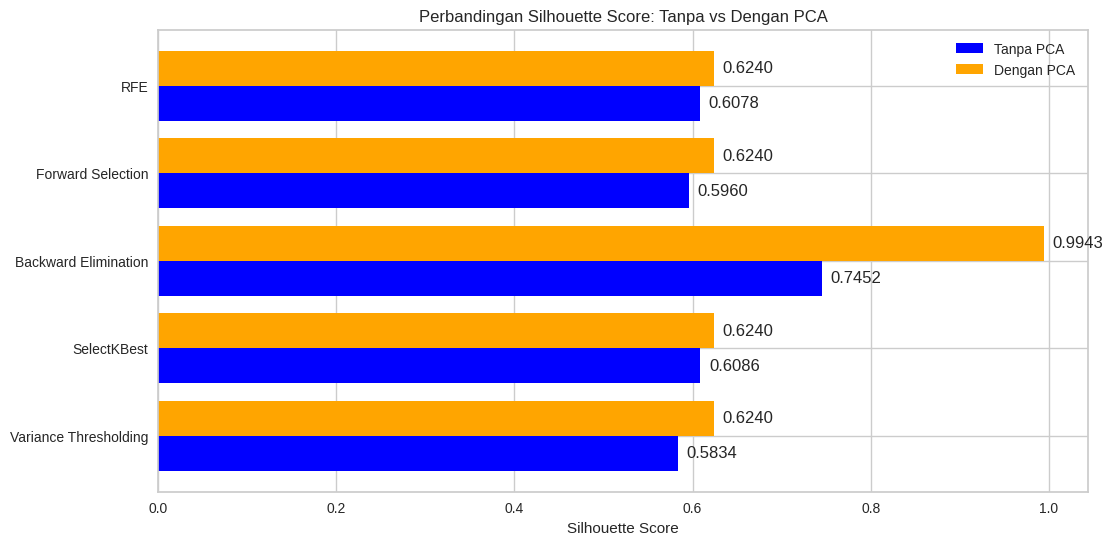

In [ ]:
# Daftar metode seleksi fitur yang diuji
model_names = list(silhouette_scores_no_pca.keys())

# Mengisi nilai untuk Model Awal setelah PCA (jika belum ada)
silhouette_scores_pca.setdefault("Model Awal", 0)

# Pastikan semua metode memiliki nilai valid (hindari None)
silhouette_no_pca_values = [silhouette_scores_no_pca[method] for method in model_names]
silhouette_pca_values = [silhouette_scores_pca.get(method, None) for method in model_names]

# Filter hanya metode yang memiliki nilai pada kedua versi
valid_methods = [method for method, no_pca, pca in zip(model_names, silhouette_no_pca_values, silhouette_pca_values) if no_pca is not None and pca is not None]

silhouette_no_pca_values = [silhouette_scores_no_pca[method] for method in valid_methods]
silhouette_pca_values = [silhouette_scores_pca[method] for method in valid_methods]

# Membuat plot perbandingan
plt.figure(figsize=(12, 6))
x_axis = range(len(valid_methods))

plt.barh(x_axis, silhouette_no_pca_values, height=0.4, label="Tanpa PCA", color='blue')
plt.barh([x + 0.4 for x in x_axis], silhouette_pca_values, height=0.4, label="Dengan PCA", color='orange')

plt.yticks([x + 0.2 for x in x_axis], valid_methods)
plt.xlabel("Silhouette Score")
plt.title("Perbandingan Silhouette Score: Tanpa vs Dengan PCA")
plt.legend()

# Menampilkan nilai pada batang grafik
for i, score in enumerate(silhouette_no_pca_values):
    plt.text(score + 0.01, i, f"{score:.4f}", va='center', fontsize=12)

for i, score in enumerate(silhouette_pca_values):
    plt.text(score + 0.01, i + 0.4, f"{score:.4f}", va='center', fontsize=12)

plt.show()

In [ ]:
# Menggunakan fitur terbaik hasil Backward Elimination
selected_features = best_features_be
df_selected = df_final[selected_features]

# Menerapkan PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
df_pca_transformed = pca.fit_transform(df_selected)

# Menentukan jumlah optimal cluster
optimal_clusters = 4

# Melakukan K-Means Clustering pada data tanpa PCA
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_final["Cluster"] = kmeans.fit_predict(df_selected)

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
# Menampilkan 5 baris pertama dari dataframe df_final
df_final.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster
0,-1.108794,1.429702,0.244828,1,-0.001892,36,0,1,1,0,0,1,0,0,0,Lansia,1
1,0.554382,1.316759,0.451724,1,2.226312,15,0,1,1,0,0,1,0,0,0,Lansia,1
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,0,1,0,0,1,0,0,0,1,Remaja,1
3,-0.326185,-1.055040,0.051724,1,0.888919,33,0,1,0,0,1,0,0,0,1,Dewasa Muda,1
4,-1.111734,-1.055040,0.648276,1,0.595235,1,1,0,0,0,1,0,0,0,1,Dewasa Muda,3


In [ ]:
# Mencetak daftar fitur yang dipilih setelah proses Backward Elimination
print("Fitur yang digunakan setelah backward elimination:", best_features_be)

Fitur yang digunakan setelah backward elimination: ['TransactionDuration', 'LoginAttempts', 'TransactionType_Credit', 'TransactionType_Debit', 'CustomerOccupation_Retired']


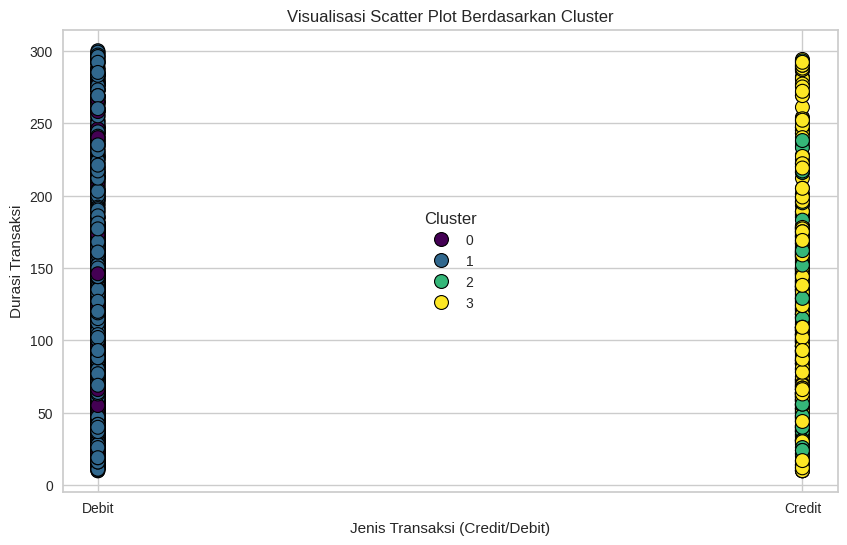

In [ ]:
# Menambahkan kolom cluster hasil dari K-Means ke dalam dataset asli
df['Cluster'] = df_final['Cluster']

# Membuat visualisasi scatter plot untuk melihat distribusi data berdasarkan cluster
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df['TransactionType'],
    y=df['TransactionDuration'],
    hue=df['Cluster'],
    palette='viridis',
    edgecolor='black',
    s=100
)

plt.xlabel("Jenis Transaksi (Credit/Debit)")
plt.ylabel("Durasi Transaksi")
plt.title("Visualisasi Scatter Plot Berdasarkan Cluster")
plt.legend(title="Cluster", loc="center")

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
# Membuat salinan dari dataset akhir untuk menjaga data asli tetap utuh
df_labeled = df_final.copy()

# Menambahkan kolom 'Cluster' yang berisi label hasil dari K-Means clustering
df_labeled['Cluster'] = kmeans.labels_

# Menampilkan lima baris pertama dari dataset yang sudah diberi label cluster
df_labeled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster
0,-1.108794,1.429702,0.244828,1,-0.001892,36,0,1,1,0,0,1,0,0,0,Lansia,1
1,0.554382,1.316759,0.451724,1,2.226312,15,0,1,1,0,0,1,0,0,0,Lansia,1
2,-0.593515,-1.450340,0.158621,1,-1.030055,23,0,1,0,0,1,0,0,0,1,Remaja,1
3,-0.326185,-1.055040,0.051724,1,0.888919,33,0,1,0,0,1,0,0,0,1,Dewasa Muda,1
4,-1.111734,-1.055040,0.648276,1,0.595235,1,1,0,0,0,1,0,0,0,1,Dewasa Muda,3


In [ ]:
# Menampilkan jumlah data yang terdapat dalam setiap cluster
print("\nJumlah Data pada Setiap Cluster:")
print(df_labeled['Cluster'].value_counts())


Jumlah Data pada Setiap Cluster:
Cluster
1    1352
0     412
3     383
2     135
Name: count, dtype: int64


In [ ]:
# Inisialisasi kembali OneHotEncoder untuk memastikan kompatibilitas dengan data yang sudah diencode
onehot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Melakukan fitting ulang encoder dengan kategori asli pada dataset awal
onehot.fit(df[['TransactionType', 'Channel', 'CustomerOccupation']])

# Mengembalikan data yang telah diencode ke bentuk kategori aslinya menggunakan inverse transform
df_labeled[['TransactionType', 'Channel', 'CustomerOccupation']] = onehot.inverse_transform(df_encoded[onehot.get_feature_names_out()])

In [ ]:
# Mengembalikan label encoding pada kolom 'Location' ke bentuk kategori aslinya
df_labeled['Location'] = label_encoder.inverse_transform(df_labeled['Location'])

# Menampilkan beberapa baris pertama dari dataset setelah inverse label encoding
df_labeled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster,TransactionType,Channel,CustomerOccupation
0,-1.108794,1.429702,0.244828,1,-0.001892,San Diego,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
1,0.554382,1.316759,0.451724,1,2.226312,Houston,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
2,-0.593515,-1.450340,0.158621,1,-1.030055,Mesa,0,1,0,0,1,0,0,0,1,Remaja,1,Debit,Online,Student
3,-0.326185,-1.055040,0.051724,1,0.888919,Raleigh,0,1,0,0,1,0,0,0,1,Dewasa Muda,1,Debit,Online,Student
4,-1.111734,-1.055040,0.648276,1,0.595235,Atlanta,1,0,0,0,1,0,0,0,1,Dewasa Muda,3,Credit,Online,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
# Mengembalikan data yang telah distandarisasi ke skala aslinya
df_labeled[columns_to_standardize] = standard_scaler.inverse_transform(df_labeled[columns_to_standardize])

# Mengembalikan data yang telah dinormalisasi ke skala aslinya
df_labeled[columns_to_normalize] = minmax_scaler.inverse_transform(df_labeled[columns_to_normalize])

# Menampilkan beberapa baris pertama dari dataset setelah proses inverse transform
df_labeled.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,Location,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAge_Binned,Cluster,TransactionType,Channel,CustomerOccupation
0,14.09,70.0,81.0,1,5112.21,San Diego,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
1,376.24,68.0,141.0,1,13758.91,Houston,0,1,1,0,0,1,0,0,0,Lansia,1,Debit,ATM,Doctor
2,126.29,19.0,56.0,1,1122.35,Mesa,0,1,0,0,1,0,0,0,1,Remaja,1,Debit,Online,Student
3,184.50,26.0,25.0,1,8569.06,Raleigh,0,1,0,0,1,0,0,0,1,Dewasa Muda,1,Debit,Online,Student
4,13.45,26.0,198.0,1,7429.40,Atlanta,1,0,0,0,1,0,0,0,1,Dewasa Muda,3,Credit,Online,Student


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Jumlah Data dalam Setiap Cluster:
 Cluster
0     412
1    1352
2     135
3     383
Name: count, dtype: int64 



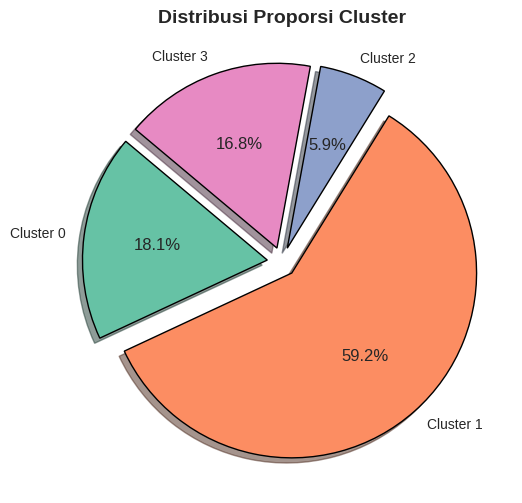

In [ ]:
# Menghitung jumlah sampel dalam setiap cluster
cluster_distribution = df_labeled['Cluster'].value_counts().sort_index()
print("\nJumlah Data dalam Setiap Cluster:\n", cluster_distribution, '\n')

# Menggunakan warna yang lebih menarik dari palet seaborn
palette_colors = sns.color_palette("Set2", len(cluster_distribution))

# Membuat efek explode untuk menyoroti setiap bagian
explode_factor = [0.08] * len(cluster_distribution)

plt.figure(figsize=(8, 6))
plt.pie(cluster_distribution,
        labels=[f'Cluster {i}' for i in cluster_distribution.index],
        autopct='%1.1f%%', startangle=140,
        colors=palette_colors,
        explode=explode_factor,
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title('Distribusi Proporsi Cluster', fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Memilih hanya kolom numerik dari dataset
numerical_columns = df_labeled.select_dtypes(include=['number']).columns

# Melakukan agregasi berdasarkan Cluster dengan statistik mean, min, dan max
cluster_summary = df_labeled.groupby('Cluster')[numerical_columns].agg(['mean', 'min', 'max'])

# Menampilkan hasil dalam format tabel
display(cluster_summary)

TransactionAmount               CustomerAge              \
                     mean   min     max        mean   min   max   
Cluster                                                           
0              251.073883  1.21  888.57   65.080097  51.0  80.0   
1              250.165466  0.26  903.19   38.035503  18.0  70.0   
2              264.163333  4.15  883.92   65.777778  51.0  80.0   
3              276.191149  2.03  890.24   38.770235  18.0  70.0   

        TransactionDuration              LoginAttempts  ...  \
                       mean   min    max          mean  ...   
Cluster                                                 ...   
0                119.463592  12.0  292.0           1.0  ...   
1                118.712278  10.0  300.0           1.0  ...   
2                108.103704  14.0  293.0           1.0  ...   
3                123.195822  10.0  294.0           1.0  ...   

        CustomerOccupation_Engineer CustomerOccupation_Retired          \
                                max                       mean min max   
Cluster                                                                  
0                                 0                        1.0   1   1   
1                                 1                        0.0   0   0   
2                                 0                        1.0   1   1   
3                                 1                        0.0   0   0   

        CustomerOccupation_Student         Cluster          
                              mean min max    mean min max  
Cluster                                                     
0                         0.000000   0   0     0.0   0   0  
1                         0.346154   0   1     1.0   1   1  
2                         0.000000   0   0     2.0   2   2  
3                         0.336815   0   1     3.0   3   3  

[4 rows x 45 columns]

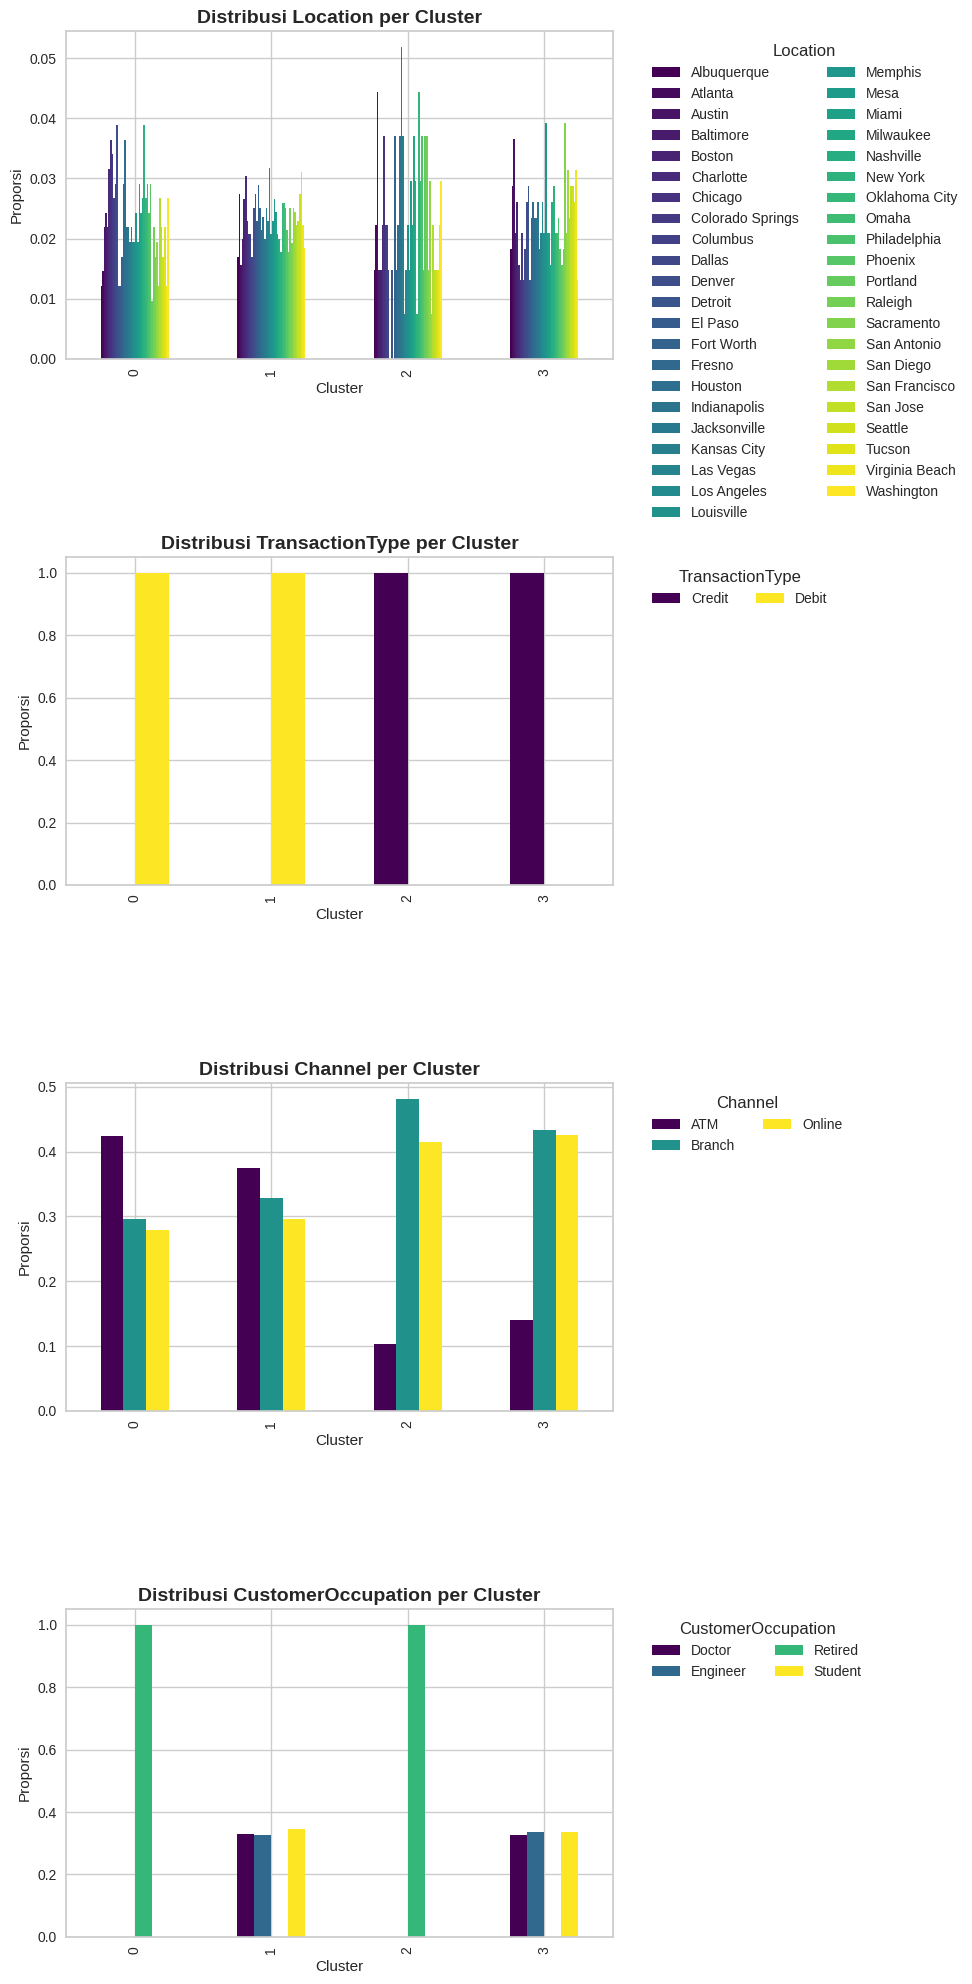

In [ ]:
# Memilih hanya kolom dengan tipe data kategorikal (objek/string)
categorical_columns = df_labeled.select_dtypes(include=['object']).columns

# Membuat subplot dengan jumlah baris sesuai dengan jumlah kolom kategorikal
fig, axes = plt.subplots(nrows=len(categorical_columns), figsize=(10, 5 * len(categorical_columns)))

# Looping untuk membuat visualisasi setiap kolom kategorikal
for i, col in enumerate(categorical_columns):
    # Menghitung proporsi setiap kategori dalam masing-masing cluster
    category_distribution = df_labeled.groupby('Cluster')[col].value_counts(normalize=True).unstack()

    # Membuat stacked bar chart untuk kategori tersebut
    category_distribution.plot(kind='bar', stacked=False, ax=axes[i], colormap='viridis')

    # Menambahkan judul, label sumbu x, dan label sumbu y
    axes[i].set_title(f'Distribusi {col} per Cluster', fontsize=14, fontweight='bold')
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel("Proporsi")

    # Menyesuaikan posisi legend agar tidak menutupi grafik
    axes[i].legend(
        title=col,
        bbox_to_anchor=(1.05, 1),  # Memindahkan legend ke luar grafik
        loc="upper left",
        ncol=2,  # Mengatur legend dalam dua kolom agar lebih rapi
        fontsize=10  # Menyesuaikan ukuran font legend agar tidak terlalu besar
    )

# Menyesuaikan tata letak subplot agar tidak tumpang tindih
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
df_labeled[df_labeled['Cluster'] == 0].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
count,412.000000,412.000000,412.000000,412.0,412.000000,412.0,412.0,412.000000,412.000000,412.000000,412.0,412.0,412.0,412.0,412.0
mean,251.073883,65.080097,119.463592,1.0,4653.123107,0.0,1.0,0.424757,0.296117,0.279126,0.0,0.0,1.0,0.0,0.0
std,208.140346,8.639067,67.107722,0.0,2038.392452,0.0,0.0,0.494907,0.457098,0.449115,0.0,0.0,0.0,0.0,0.0
min,1.210000,51.000000,12.000000,1.0,1014.630000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
25%,80.272500,57.000000,66.000000,1.0,2937.407500,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
50%,200.460000,64.000000,113.000000,1.0,4683.440000,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
75%,361.395000,72.000000,159.000000,1.0,6403.970000,0.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0
max,888.570000,80.000000,292.000000,1.0,7996.700000,0.0,1.0,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
df_labeled[df_labeled['Cluster'] == 1].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
count,1352.000000,1352.000000,1352.000000,1352.0,1352.000000,1352.0,1352.0,1352.000000,1352.000000,1352.000000,1352.000000,1352.000000,1352.0,1352.000000,1352.0
mean,250.165466,38.035503,118.712278,1.0,5217.354120,0.0,1.0,0.375000,0.329142,0.295858,0.328402,0.325444,0.0,0.346154,1.0
std,214.873292,14.674467,71.326892,0.0,4244.576395,0.0,0.0,0.484302,0.470076,0.456596,0.469806,0.468714,0.0,0.475919,0.0
min,0.260000,18.000000,10.000000,1.0,101.250000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
25%,76.062500,26.000000,61.000000,1.0,1235.280000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
50%,187.285000,35.000000,111.000000,1.0,4840.855000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0
75%,372.755000,50.000000,162.250000,1.0,8504.027500,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0
max,903.190000,70.000000,300.000000,1.0,14977.990000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0


In [ ]:
df_labeled[df_labeled['Cluster'] == 2].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
count,135.000000,135.000000,135.000000,135.0,135.000000,135.0,135.0,135.000000,135.000000,135.000000,135.0,135.0,135.0,135.0,135.0
mean,264.163333,65.777778,108.103704,1.0,4373.284370,1.0,0.0,0.103704,0.481481,0.414815,0.0,0.0,1.0,0.0,2.0
std,239.614655,8.786580,64.811814,0.0,2018.822908,0.0,0.0,0.306011,0.501518,0.494525,0.0,0.0,0.0,0.0,0.0
min,4.150000,51.000000,14.000000,1.0,1006.120000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0
25%,60.595000,58.000000,57.000000,1.0,2544.580000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0
50%,213.760000,65.000000,100.000000,1.0,4253.180000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,2.0
75%,356.410000,74.000000,148.000000,1.0,6195.470000,1.0,0.0,0.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,2.0
max,883.920000,80.000000,293.000000,1.0,7950.740000,1.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0,2.0


In [ ]:
df_labeled[df_labeled['Cluster'] == 3].describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
count,383.000000,383.000000,383.000000,383.0,383.000000,383.0,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.0,383.000000,383.0
mean,276.191149,38.770235,123.195822,1.0,5539.087572,1.0,0.0,0.140992,0.433420,0.425587,0.326371,0.336815,0.0,0.336815,3.0
std,229.391792,14.382561,69.028341,0.0,4438.352255,0.0,0.0,0.348469,0.496196,0.495079,0.469498,0.473239,0.0,0.473239,0.0
min,2.030000,18.000000,10.000000,1.0,105.010000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
25%,82.515000,26.000000,66.000000,1.0,1258.565000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
50%,217.500000,37.000000,116.000000,1.0,5615.260000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.0
75%,409.555000,51.000000,161.500000,1.0,8678.030000,1.0,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.0
max,890.240000,70.000000,294.000000,1.0,14935.500000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,3.0


Tulis hasil interpretasinya di sini.
1. Cluster 0: Kelompok Nasabah Pensiunan dengan Transaksi Debit Dominan
  - Rata-rata Jumlah Transaksi: $251.07

  - Rata-rata Usia Nasabah: 65 tahun

  - Rata-rata Durasi Transaksi: 119 detik

  - Rata-rata Saldo Rekening: $4,653

  - Jenis Transaksi: 100% transaksi debit

  Saluran Transaksi:

  - ATM: 42.5%

  - Cabang Bank: 29.6%

  - Online: 27.9%

  Pekerjaan Nasabah: 100% pensiunan (Retired)

    📌 Analisis:
    Cluster ini terdiri dari nasabah pensiunan dengan usia rata-rata 65 tahun, yang mayoritas hanya melakukan transaksi debit. Mereka memiliki saldo rekening cukup tinggi dan lebih memilih melakukan transaksi melalui ATM, cabang bank, serta online banking.

    💡 Strategi Bisnis:

    - Bank dapat menawarkan produk tabungan pensiun dengan bunga menarik.

    - Meningkatkan layanan ATM dan cabang bank karena nasabah ini masih sering menggunakan layanan tersebut.

    - Memberikan bantuan literasi digital untuk mendorong penggunaan layanan online banking yang lebih luas.

2. Cluster 1: Kelompok Profesional Muda dengan Transaksi Debit Dominan
  - Rata-rata Jumlah Transaksi: $250.17

  - Rata-rata Usia Nasabah: 38 tahun

  - Rata-rata Durasi Transaksi: 118 detik

  - Rata-rata Saldo Rekening: $5,217

  Jenis Transaksi: 100% transaksi debit

  Saluran Transaksi:

  - ATM: 37.5%

  - Cabang Bank: 32.9%

  - Online: 29.6%

  Pekerjaan Nasabah:

  - Dokter: 32.8%

  - Engineer: 32.5%

  - Mahasiswa: 34.6%

  Tidak ada pensiunan dalam cluster ini

    📌 Analisis:
    Cluster ini terdiri dari profesional muda (dokter & engineer) serta mahasiswa, dengan usia rata-rata 38 tahun. Mereka memiliki saldo rekening lebih tinggi dibanding Cluster 0, dan masih lebih banyak melakukan transaksi debit dibanding kredit. Saluran transaksi yang digunakan cukup merata, dengan penggunaan ATM, cabang, dan online banking yang seimbang.

    💡 Strategi Bisnis:

    - Menawarkan kartu kredit dengan limit rendah hingga menengah untuk menarik mereka mulai menggunakan transaksi kredit.

    - Menyediakan program cashback atau reward untuk transaksi online guna meningkatkan penggunaan layanan digital banking.

    - Mempromosikan produk investasi dan asuransi kesehatan karena banyak dari mereka adalah profesional dengan potensi penghasilan tinggi.

3. Cluster 2: Pensiunan dengan Transaksi Kredit Dominan
  - Rata-rata Jumlah Transaksi: $264.16

  - Rata-rata Usia Nasabah: 65.8 tahun

  - Rata-rata Durasi Transaksi: 108 detik

  - Rata-rata Saldo Rekening: $4,373

  Jenis Transaksi: 100% transaksi kredit

  Saluran Transaksi:

  - ATM: 10.4%

  - Cabang Bank: 48.1%

  - Online: 41.5%

  Pekerjaan Nasabah: 100% pensiunan

    📌 Analisis:
    Cluster ini didominasi oleh nasabah pensiunan dengan rata-rata usia 65 tahun ke atas. Mereka lebih banyak menggunakan transaksi kredit dibanding debit, yang menunjukkan kecenderungan untuk menggunakan kartu kredit atau fasilitas pinjaman. Saluran transaksi yang paling sering digunakan adalah cabang bank (48%), diikuti oleh online banking (41%), sementara ATM hanya digunakan oleh 10% nasabah.

    💡 Strategi Bisnis:

    - Menawarkan produk tabungan dan deposito berjangka dengan keuntungan bunga yang menarik untuk segmen pensiunan.

    - Meningkatkan edukasi literasi digital untuk mendorong adopsi transaksi online banking, mengingat persentase penggunaannya sudah cukup tinggi.

    - Menyediakan layanan prioritas di cabang untuk memastikan kenyamanan nasabah dalam bertransaksi secara langsung.

    - Memberikan promo atau insentif untuk transaksi online agar nasabah lebih banyak menggunakan layanan digital.

4. Cluster 3: Profesional Muda dengan Transaksi Kredit Dominan
  - Rata-rata Jumlah Transaksi: $276.19

  - Rata-rata Usia Nasabah: 38.8 tahun

  - Rata-rata Durasi Transaksi: 123 detik

  - Rata-rata Saldo Rekening: $5,539

  Jenis Transaksi: 100% transaksi kredit

  Saluran Transaksi:

  - ATM: 14.1%

  - Cabang Bank: 43.3%

  - Online Banking: 42.6%

  Pekerjaan Nasabah:

  - Dokter: 32.6%

  - Engineer: 33.7%

  - Mahasiswa: 33.7%

    📌 Analisis:
    Cluster ini mencakup profesional muda, terutama dari kalangan dokter, insinyur, dan mahasiswa, dengan usia rata-rata 38 tahun. Mereka lebih banyak melakukan transaksi kredit dibanding debit, yang menunjukkan kebiasaan penggunaan kartu kredit atau cicilan. Dari sisi kanal transaksi, mereka cukup seimbang antara cabang bank (43%) dan online banking (42%), sementara ATM hanya digunakan oleh 14% dari mereka.

    💡 Strategi Bisnis:

    - Menawarkan kartu kredit atau produk pinjaman yang menarik bagi dokter dan insinyur, dengan benefit khusus seperti cashback untuk kebutuhan profesional mereka.

    - Mengembangkan layanan digital banking yang lebih optimal, karena hampir 43% dari transaksi mereka dilakukan secara online.

    - Menyediakan promo dan program loyalitas bagi mahasiswa untuk meningkatkan penggunaan layanan keuangan digital sejak dini.

    - Mendorong edukasi keuangan dan investasi bagi segmen profesional muda agar mereka lebih memanfaatkan produk keuangan yang tersedia.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Menyimpan data hasil Clustering
df_labeled.to_csv("clustering_dataset.csv", index=False)

files.download("clustering_dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>